<a href="https://colab.research.google.com/github/caela09/AML/blob/master/Campher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import cvxpy as cvx

In [ ]:
n = 100
dim = 30
lamda = 1/np.sqrt(n);
np.random.seed(50)
w = np.matrix(np.random.multivariate_normal([0.0]*dim, np.eye(dim))).T
X = np.matrix(np.random.multivariate_normal([0.0]*dim, np.eye(dim), size = n))
Y = X * w
L = (np.linalg.svd(X)[1][0])**2
iter= 100

In [ ]:
def obj(w):
    r = X*w-Y;
    return np.sum(np.multiply(r,r))/2 +  lamda * np.sum(np.abs(w))

def subgrad(w):
    return  X.T*(X*w-Y) + lamda*np.sign(w) 

def f_grad(w):
    return  X.T*(X*w-Y) 

def soft_threshold(w,mu):
    return np.multiply(np.sign(w), np.maximum(np.abs(w)- mu,0))  

def smooth_grad(w, mu):
    temp = np.multiply((np.abs(w)<=mu),w/mu) + np.multiply((np.abs(w)>mu), np.sign(w)) 
    return X.T*(X*w-Y) + lamda * temp

In [ ]:
w = np.matrix([0.0]*dim).T
obj_SD = []
gamma = 0.01
for t in range(0, iter):
    obj_val = obj(w)
    w = w - gamma * subgrad(w)/np.sqrt(t+1)
    
    obj_SD.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 1761.785102
iter= 5,	objective= 7.494788
iter= 10,	objective= 3.581135
iter= 15,	objective= 2.898985
iter= 20,	objective= 2.670272
iter= 25,	objective= 2.566551
iter= 30,	objective= 2.511531
iter= 35,	objective= 2.479488
iter= 40,	objective= 2.459642
iter= 45,	objective= 2.446799
iter= 50,	objective= 2.438206
iter= 55,	objective= 2.432302
iter= 60,	objective= 2.428158
iter= 65,	objective= 2.425195
iter= 70,	objective= 2.423043
iter= 75,	objective= 2.421459
iter= 80,	objective= 2.420278
iter= 85,	objective= 2.419389
iter= 90,	objective= 2.418712
iter= 95,	objective= 2.418194


Text(0, 0.5, 'Objective error')

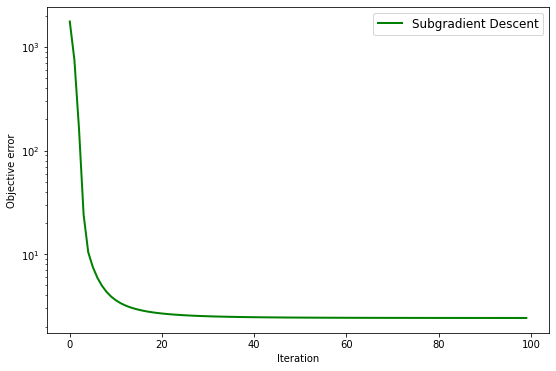

In [ ]:
t = np.arange(0, iter)
fig, ax = plt.subplots(figsize = (9, 6))
plt.semilogy(t, np.array(obj_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')

In [ ]:
w = np.matrix([0.0]*dim).T
smoothness = 0.01
obj_SM = []
for t in range(0, iter):
    obj_val = obj(w)
    w = w - smooth_grad(w, smoothness)/(L + lamda/smoothness)
    
    obj_SM.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 1761.785102
iter= 5,	objective= 31.845304
iter= 10,	objective= 5.305073
iter= 15,	objective= 2.988454
iter= 20,	objective= 2.590253
iter= 25,	objective= 2.477683
iter= 30,	objective= 2.438886
iter= 35,	objective= 2.424686
iter= 40,	objective= 2.419395
iter= 45,	objective= 2.417412
iter= 50,	objective= 2.416667
iter= 55,	objective= 2.416387
iter= 60,	objective= 2.416281
iter= 65,	objective= 2.416242
iter= 70,	objective= 2.416227
iter= 75,	objective= 2.416221
iter= 80,	objective= 2.416219
iter= 85,	objective= 2.416218
iter= 90,	objective= 2.416218
iter= 95,	objective= 2.416218


Text(0, 0.5, 'Objective')

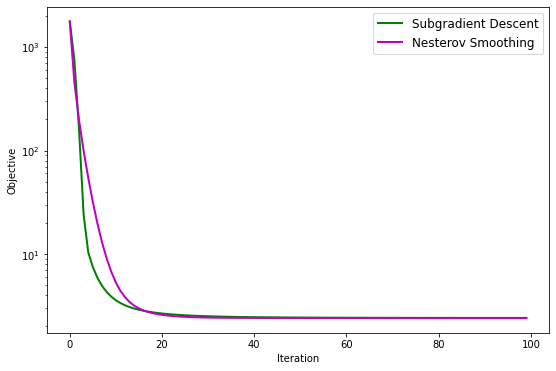

In [ ]:
## Plot objective error vs. iteration (log scale)
t = np.arange(0, iter)
fig, ax = plt.subplots(figsize = (9, 6))
plt.semilogy(t, np.array(obj_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective')

In [ ]:
w = np.matrix([0.0]* dim).T
obj_PG = []
for t in range(0, iter):
  obj_val = obj(w)
  w = w - (1/L) * f_grad(w)
  w= soft_threshold(w,lamda/L)
  
  obj_PG.append(obj_val.item())
  if (t%5==0):
    print('iter = {}, \tobjective = {:3f}'.format(t, obj_val.item()))

iter = 0, 	objective = 1761.785102
iter = 5, 	objective = 28.002804
iter = 10, 	objective = 4.813366
iter = 15, 	objective = 2.892747
iter = 20, 	objective = 2.559209
iter = 25, 	objective = 2.465096
iter = 30, 	objective = 2.433524
iter = 35, 	objective = 2.422408
iter = 40, 	objective = 2.418440
iter = 45, 	objective = 2.417017
iter = 50, 	objective = 2.416505
iter = 55, 	objective = 2.416321
iter = 60, 	objective = 2.416255
iter = 65, 	objective = 2.416231
iter = 70, 	objective = 2.416222
iter = 75, 	objective = 2.416219
iter = 80, 	objective = 2.416218
iter = 85, 	objective = 2.416218
iter = 90, 	objective = 2.416218
iter = 95, 	objective = 2.416218


Text(0, 0.5, 'Objective Error')

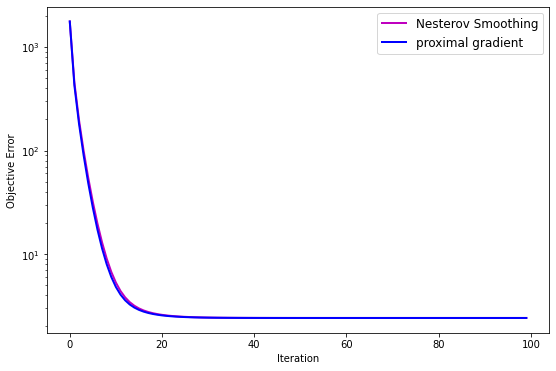

In [ ]:
t = np.arange(0, iter)
fig, ax = plt.subplots(figsize = (9, 6))

plt.semilogy(t, np.array(obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG), 'b', linewidth = 2, label = 'proximal gradient')

plt.legend(prop = {'size': 12})
plt.xlabel('Iteration')
plt.ylabel('Objective Error')

In [ ]:
w = np.matrix([0.0]*dim).T
obj_PG_LS = []
LL=1
gamma = 1/LL
beta = 1.2
for t in range(0, iter):
    obj_val = obj(w)
    w_prev = w
    delta = 1
    while (delta>1e-3):
        gamma = 1/LL
        w = w_prev - gamma * f_grad(w_prev)    
        w = soft_threshod(w,lamda * gamma)
        delta = obj(w) - obj_val - f_grad(w_prev).T*(w-w_prev)- (LL/2) * np.linalg.norm(w-w_prev)**2
        LL = LL*beta
    LL = LL/beta   
    
    obj_PG_LS.append(obj_val.item())


Text(0, 0.5, 'Objective error')

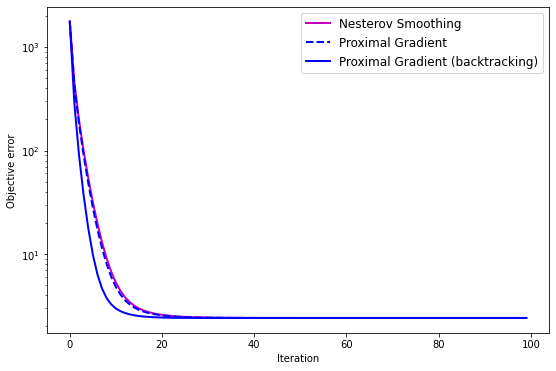

In [ ]:
t = np.arange(0, iter)
fig, ax = plt.subplots(figsize = (9, 6))
plt.semilogy(t, np.array(obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG), 'b--', linewidth = 2, label = 'Proximal Gradient')
plt.semilogy(t, np.array(obj_PG_LS), 'b', linewidth = 2, label = 'Proximal Gradient (backtracking)')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')

In [ ]:
w = np.matrix([0.0]*dim).T
v = w
obj_APG = []
gamma = 1/L
for t in range(0, iter):
    obj_val = obj(w)
    w_prev = w
    w = v - gamma * f_grad(v)
    v = w + t/(t+3) * (w - w_prev)

    obj_APG.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 1761.785102
iter= 5,	objective= 10.177714
iter= 10,	objective= 2.739669
iter= 15,	objective= 2.456493
iter= 20,	objective= 2.421731
iter= 25,	objective= 2.420303
iter= 30,	objective= 2.418191
iter= 35,	objective= 2.418963
iter= 40,	objective= 2.418409
iter= 45,	objective= 2.418249
iter= 50,	objective= 2.418272
iter= 55,	objective= 2.418364
iter= 60,	objective= 2.418329
iter= 65,	objective= 2.418282
iter= 70,	objective= 2.418296
iter= 75,	objective= 2.418319
iter= 80,	objective= 2.418310
iter= 85,	objective= 2.418299
iter= 90,	objective= 2.418304
iter= 95,	objective= 2.418309


In [ ]:
w = np.matrix([0.0]*dim).T
v = w
obj_APG_LS = []
L=1
gamma = 1/L
beta = 1.2
for t in range(0,iter):
    obj_val = obj(w)
    w_prev = w
    delta = 1
    while (delta>1e-3):
        gamma = 1/L
        w = v - gamma * f_grad(v)    
        w = soft_threshod(w,lamda * gamma)
        delta = obj(w) - obj_val - f_grad(w_prev).T*(w-w_prev)- (L/2) * np.linalg.norm(w-w_prev)**2
        L = L*beta
    L = L/beta    
    v = w + t/(t+3) * (w - w_prev)

    obj_APG_LS.append(obj_val.item())
    if (t%5==0):
        print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))

iter= 0,	objective= 1761.785102
iter= 5,	objective= 4.556348
iter= 10,	objective= 2.464957
iter= 15,	objective= 2.433561
iter= 20,	objective= 2.416920
iter= 25,	objective= 2.417102
iter= 30,	objective= 2.416324
iter= 35,	objective= 2.416287
iter= 40,	objective= 2.416243
iter= 45,	objective= 2.416223
iter= 50,	objective= 2.416223
iter= 55,	objective= 2.416218
iter= 60,	objective= 2.416219
iter= 65,	objective= 2.416218
iter= 70,	objective= 2.416218
iter= 75,	objective= 2.416218
iter= 80,	objective= 2.416218
iter= 85,	objective= 2.416218
iter= 90,	objective= 2.416218
iter= 95,	objective= 2.416218


Text(0, 0.5, 'Objective error')

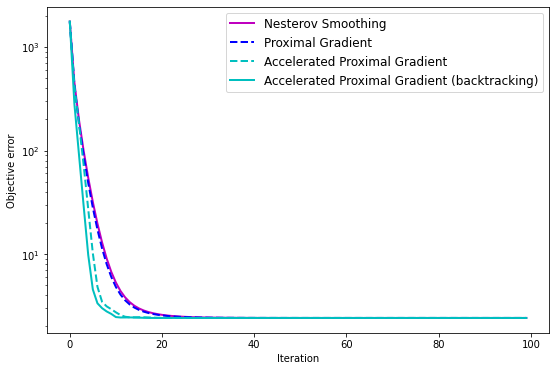

In [ ]:
t = np.arange(0, iter)
fig, ax = plt.subplots(figsize = (9, 6))
plt.semilogy(t, np.array(obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG), 'b--', linewidth = 2, label = 'Proximal Gradient')
ax.semilogy(t, np.array(obj_APG), 'c--', linewidth = 2, label = 'Accelerated Proximal Gradient')
ax.semilogy(t, np.array(obj_APG_LS), 'c', linewidth = 2, label = 'Accelerated Proximal Gradient (backtracking)')
ax.legend(prop={'size':12})
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective error')